# Age Estimation and Gender Classification

In this assignment, you will train CNN models to estimate a person's age and gender by given a face image. Please read carefully all the instructions before you start to write your code.

**Your tasks**

You need train two CNN models:
- one is defined by you with a few restrictions and be trained from scratch, save it as `age_gender_A.h5`
- the other is to finetune a pretrained model, save it as `age_gender_B.h5`

**Dataset**

Your models will be trained and validated on a folder `train_val/` containing 5,000 labeled face images (size: 128 x 128), originated from the UTKFace dataset. During marking, your code will be tested on unseen test data. 

**Performance metric**

The metrics for measuring the performance on the test set are:
- age estimation: MAE (Mean Absolute Error)
- gender classification: accuracy

**Please use the GPU time wisely.**

Just be aware that there is some limit of free GPU usage (It is said the users can use up to 12 hours in row. But many people found they reached its limit far less than 12 hours.). Therefore, I would give you three suggestions to mimimise the risk of reaching the limit.

1. Make sure you have a stable internet connection.
2. Double check all the hyperparameters are good before you start to train the model.
3. According to my experience, each model should be trained in less than 2 hours. If much longer than that, you'd better consider adjusting the architecture.

## Setting Up: Mount the google drive
Mount your google drive to the notebook. 

Also don't forget to **enable GPU** before your training.


In [41]:
os.listdir(path)

['25_0_0_20170105162443771.jpg.chip.jpg',
 '28_1_0_20170103182323771.jpg.chip.jpg',
 '8_1_0_20170109202257880.jpg.chip.jpg',
 '32_1_0_20170108224936101.jpg.chip.jpg',
 '32_0_3_20170117154217366.jpg.chip.jpg',
 '27_1_2_20170116170654971.jpg.chip.jpg',
 '4_1_0_20170109192714731.jpg.chip.jpg',
 '27_0_0_20170103182122389.jpg.chip.jpg',
 '30_1_1_20170113002921717.jpg.chip.jpg',
 '26_1_1_20170113000646211.jpg.chip.jpg',
 '85_0_0_20170111210457043.jpg.chip.jpg',
 '30_1_0_20170117092552049.jpg.chip.jpg',
 '28_1_3_20170119195104970.jpg.chip.jpg',
 '26_0_1_20170117003249556.jpg.chip.jpg',
 '17_1_4_20170103233515202.jpg.chip.jpg',
 '32_1_1_20170112215155305.jpg.chip.jpg',
 '32_0_1_20170113142304517.jpg.chip.jpg',
 '44_0_3_20170104204837339.jpg.chip.jpg',
 '50_1_1_20170120222821475.jpg.chip.jpg',
 '27_0_2_20170116174628743.jpg.chip.jpg',
 '30_0_0_20170117152309069.jpg.chip.jpg',
 '47_0_0_20170116204145373.jpg.chip.jpg',
 '30_0_2_20170116163631134.jpg.chip.jpg',
 '77_1_0_20170110131558278.jpg.chip.

In [43]:
#
# Add your code here
#
# from google.colab import drive

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# drive.mount('/content/drive')
# paths=['/content/drive/MyDrive/train_val']


# set this to the path where you unzip the Google Driver zip download
# in bash shell in the current working directory type `unzip train_val-20240219T160046Z-001 && rm train_val-20240219T160046Z-001`
path='./train_val'

pixels = []
ages = []
genders = [] 

files = os.listdir(path)
for img in files:
  i=i+1
  gender = img.split("_")[1]
  age = img.split("_")[0]
  if gender != '0' and gender != '1':
    print(img)
  img = cv2.imread(str(path)+"/"+str(img))
  img=cv2.resize(img,(128,128))
  pixels.append(np.array(img))
  genders.append(np.array(gender))
  ages.append(np.array(age))
    # if i == 100:
    #   break
pixels = np.array(pixels,np.float32)
genders = np.array(genders,np.int64)
ages = np.array(ages,np.int64)

## Visualize a few photos
It is always benificial to know your data well before you start. Here display a few (at least 20) images together with its corresponding age and gender from the `train_val/` folder to have a first impression of the dataset. You may also check what the size of the images are.

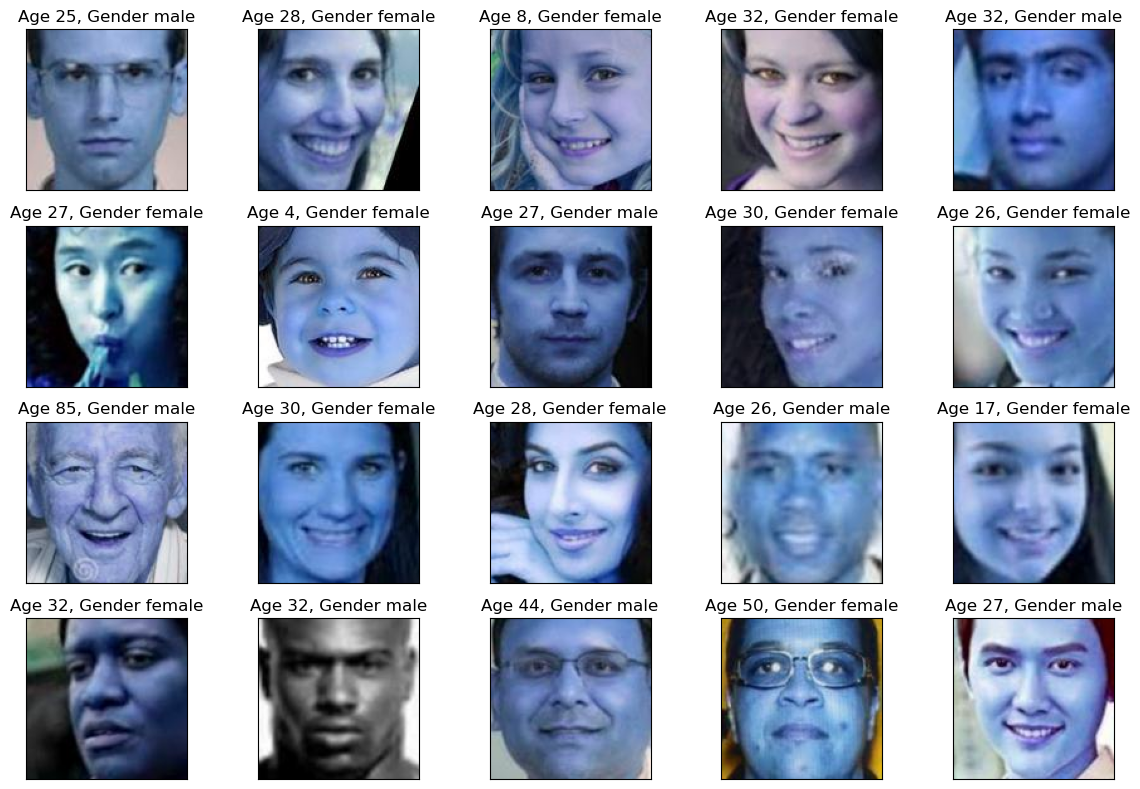

In [44]:
#
# Add your code here
# why would you ever do the plotting/display before ## STEP1: Data pre-processing
# imshow only works on data scaled between 0 and 1 so do pre-processing first
pixels2 = pixels/255

my_arr = np.array(range(0,20)).reshape((4,5))
gender_dict = {0:'male', 1:'female'}
fig, ax = plt.subplots(4, 5, figsize=(12,8))

for i in range(0,4):
  for j in range(0,5):
    ax[i][j].set_xticks([])
    ax[i][j].set_yticks([])
    ax[i][j].grid(False)
    ax[i][j].imshow(pixels2[my_arr[i][j]])
    ax[i][j].set_title("Age %d, Gender %s" % (ages[my_arr[i][j]], gender_dict[genders[my_arr[i][j]]]))
fig.tight_layout()

## Rearrange the dataset
You may do any arrangement for the dataset to suit your later process, such as splitting into training set and validation set, saving the gender labels and age some how, and so on.


In [3]:
#
# Add your code here
#
from sklearn.model_selection import train_test_split

(x_train, x_test,
 y_train_gender, y_test_gender,
 y_train_age, y_test_age) = train_test_split(pixels,genders,ages,random_state=100,train_size=0.8)



## STEP1: Data pre-processing
Now you need do some pre-processing before feeding data into a CNN network. You may consider:

1.	Rescale the pixel values (integers between 0 and 255) to [0,1]. **You must do this rescaling.** Otherwise the testing performance will be affected significantly, as the test images will be rescaling in this way. 
2.	Data augmentation.

**Don't rescale the age to [0,1].** Otherwise the testing performance will be affected significantly, as the original age is used in the testing stage. 

In [4]:

x_train=x_train/255
x_test=x_test/255

# we can test augmenting later but not sure you want to

## STEP2A: Build your own CNN network
Define your own CNN for classifying the gender and predicting the age. Though there are two tasks, you need **only one CNN model, but with two outputs** - you may search online for solution.

There are a few restrictions about your network as follows.
1.	The input size must be 128 x 128 x 3, which means you **should not resize** the original images. This is because my test code relies on this particular input size. Any other size will cause problem in the testing stage.
2.  Please treat the gender classification as a binary problem, i.e., **the output layer for the gender branch has only 1 unit**, instead of 2 (though it is correct to treat the gender classification as a mutli-class problem where class number is 2, the last layer has 2 units). This is because my test code only works for the 1-unit-last-layer gender branch setting. 
3.	The size of feature maps being fed to the first fully connected layer must be less than 10 x 10, while there is no number limitation about the depth.
4.	You may choose any techniques for preventing overfitting. 

In the end of the cell, use `modelA.summary()` to output the model architecture. You may also use `plot_model()` to visualize its architecture.

In [36]:
# Import dependencies
import tensorflow as tf
import pandas as pd
# from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,BatchNormalization,Flatten,Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint


def make_upstream(inputs, no_of_conv_layers=(16,32)):
    x=inputs

    for i in no_of_conv_layers:
        x=Conv2D(filters=i, kernel_size=(3,3), padding='same', strides=(1, 1), kernel_regularizer=l2(0.001))(x)
        x=Activation('relu')(x)
        x=BatchNormalization(axis=-1)(x)
        x=MaxPooling2D(pool_size = (2,2))(x)
        x=Dropout(0.1)(x)

    return x


def build_age_branch(inputs, no_of_conv_layers=(16,32)):
    x=make_upstream(inputs, no_of_conv_layers)
    x=Flatten()(x)
    x=Dense(128,activation='relu')(x)
    x=Dropout(0.2)(x)
    x=Dense(1)(x)
    x=Activation("linear", name="age_output")(x)
    
    return x


def build_gender_branch(inputs, no_of_conv_layers=(16,32)):

    x=make_upstream(inputs, no_of_conv_layers)
    x=Flatten()(x)
    x=Dense(128,activation='relu')(x)
    x=Dropout(0.2)(x)
    x=Dense(1)(x)
    x=Activation("sigmoid", name="gender_output")(x)

    
    return x

input_shape = (128, 128, 3)
inputs = Input(shape=input_shape)
age_branch = build_age_branch(inputs, no_of_conv_layers=(16,32,64))
gender_branch = build_gender_branch(inputs, no_of_conv_layers=(16,32,64))

modelA = Model(inputs=inputs,
               outputs = [gender_branch,age_branch],
               name="faces")
modelA.summary()

Model: "faces"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 128, 128, 16)         448       ['input_2[0][0]']             
                                                                                                  
 conv2d_4 (Conv2D)           (None, 128, 128, 16)         448       ['input_2[0][0]']             
                                                                                                  
 activation_7 (Activation)   (None, 128, 128, 16)         0         ['conv2d_7[0][0]']            
                                                                                              

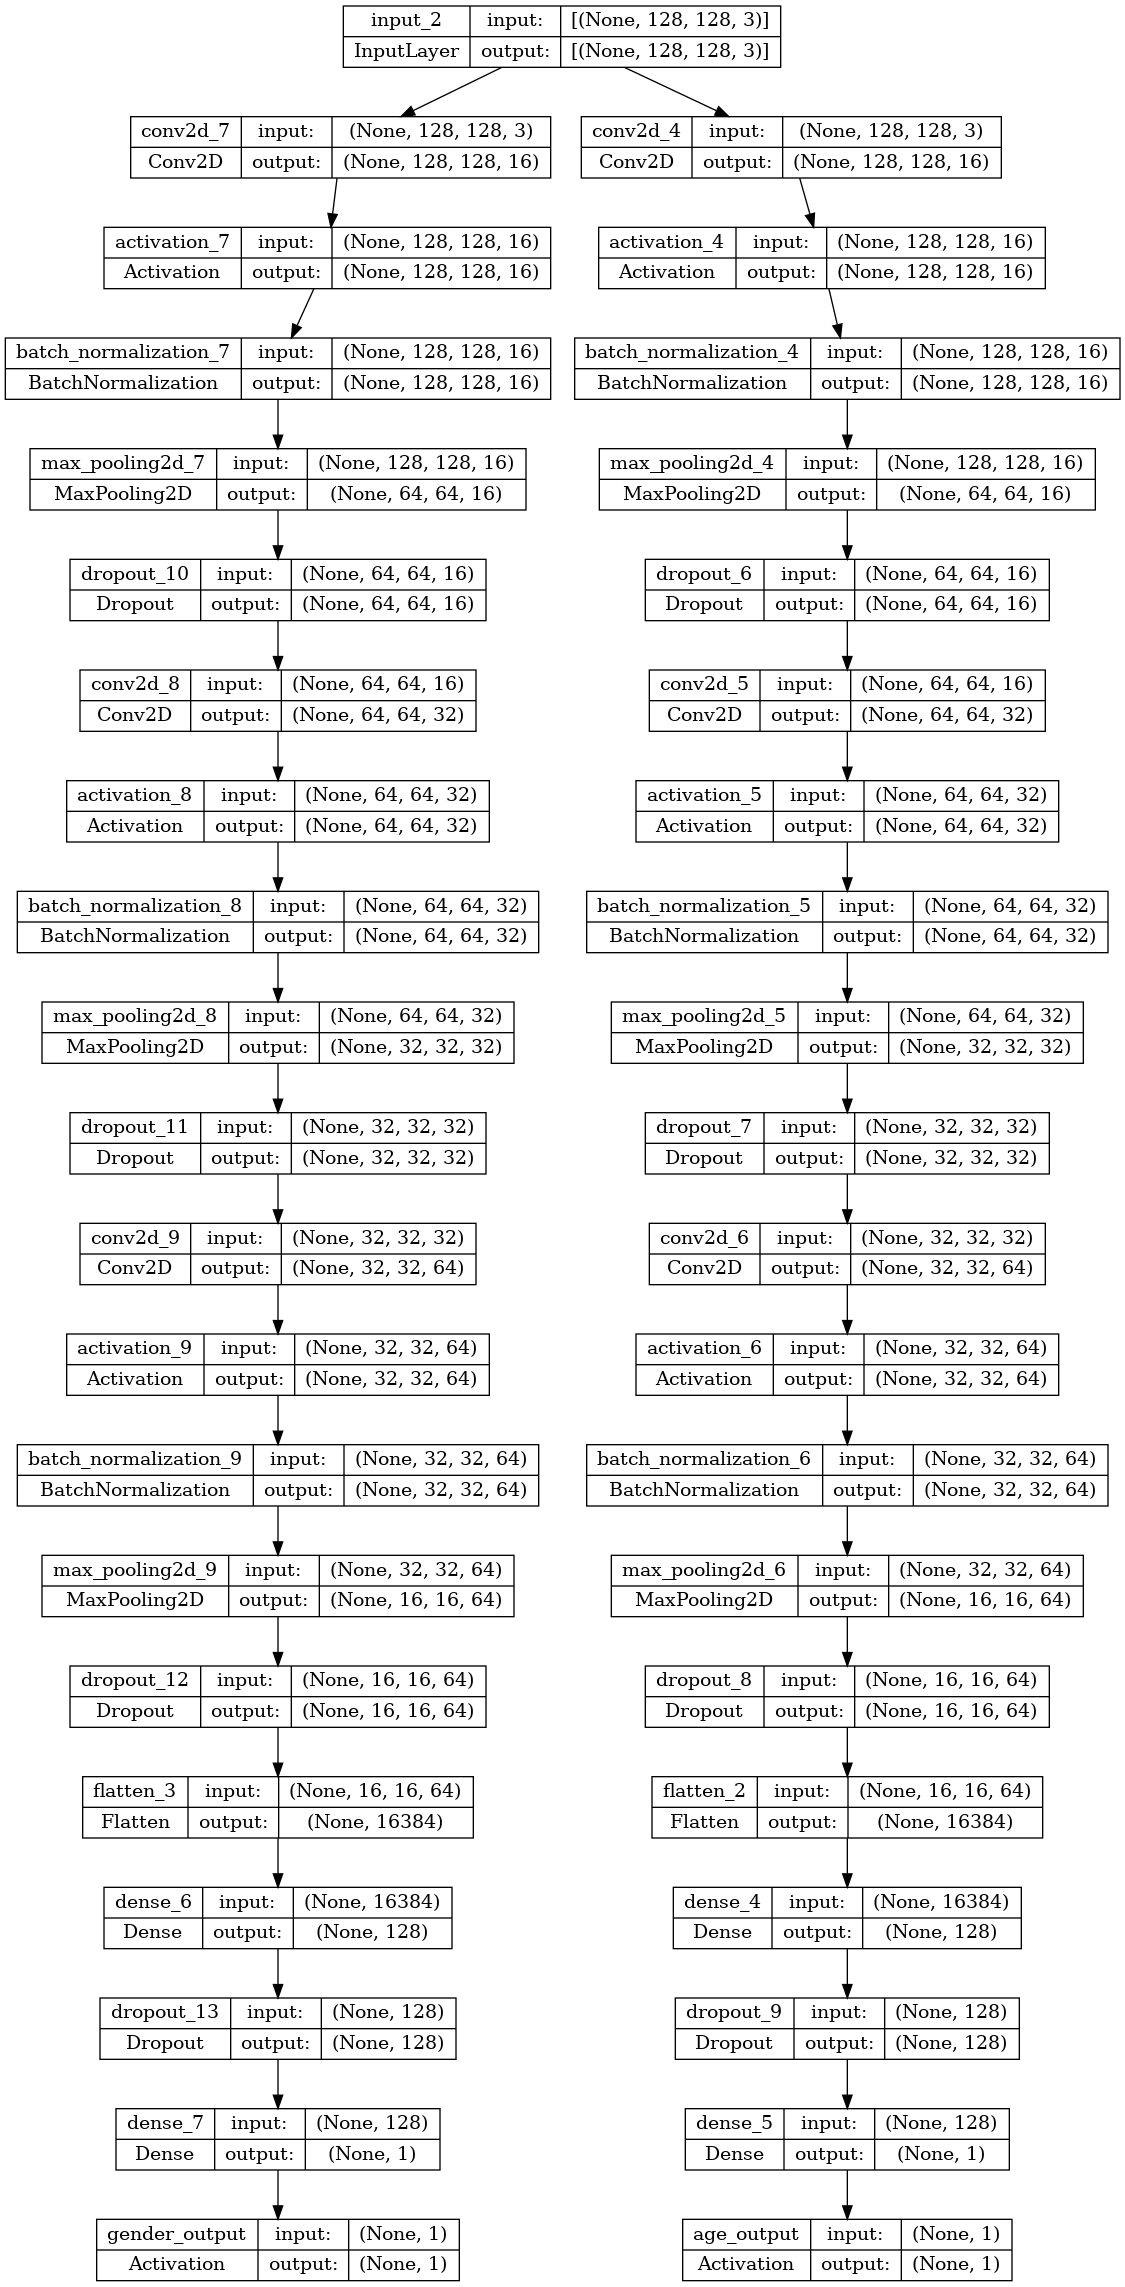

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(modelA, show_shapes=True)

## STEP3A: Compile and train your model
Compile and train your model here. 
Save your model by `modelA.save(your_model_folder+"age_gender_A.h5")` after training. 

**DON'T use any other name for your model file.** This is because my test code relies on this particular model name. Any other file name will cause problem in the testing stage.

**Save the model with `save()` instead of `save_weights()`.** This is because I will load the model by 

`modelA = load_model(model_folder+"age_gender_A.h5")`. 


In [38]:
#
# Add your code here
#-
num_epochs=25
model_folder='output/'
checkpointer = ModelCheckpoint(model_folder, monitor='loss', verbose=1, save_best_only=True,
                               save_weights_only=False, mode='auto', save_freq='epoch')
callback_list=[checkpointer]

modelA.compile(optimizer=Adam(),loss={'gender_output':'binary_crossentropy',
                                      'age_output':'mse'},
               metrics={'gender_output':'accuracy',
                        'age_output':'mae'})
modelA.fit(x=x_train,
           y={"gender_output": y_train_gender, "age_output": y_train_age},
           validation_data=(x_test,{"gender_output": y_test_gender, "age_output": y_test_age}),
           epochs=num_epochs, callbacks=[callback_list], batch_size=32)

# modelA.save(model_folder+"age_gender_A.h5")

Epoch 1/25
125/125 [==============================] - ETA: 0s - loss: 312.6606 - gender_output_loss: 0.7325 - age_output_loss: 311.7894 - gender_output_accuracy: 0.7285 - age_output_mae: 13.4062
Epoch 1: loss improved from inf to 312.66064, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 15s 113ms/step - loss: 312.6606 - gender_output_loss: 0.7325 - age_output_loss: 311.7894 - gender_output_accuracy: 0.7285 - age_output_mae: 13.4062 - val_loss: 2316.7759 - val_gender_output_loss: 8.5855 - val_age_output_loss: 2308.0515 - val_gender_output_accuracy: 0.5060 - val_age_output_mae: 43.8795
Epoch 2/25
125/125 [==============================] - ETA: 0s - loss: 180.2580 - gender_output_loss: 0.3829 - age_output_loss: 179.7363 - gender_output_accuracy: 0.8207 - age_output_mae: 10.2293
Epoch 2: loss improved from 312.66064 to 180.25803, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 110ms/step - loss: 180.2580 - gender_output_loss: 0.3829 - age_output_loss: 179.7363 - gender_output_accuracy: 0.8207 - age_output_mae: 10.2293 - val_loss: 309.8068 - val_gender_output_loss: 4.8037 - val_age_output_loss: 304.8641 - val_gender_output_accuracy: 0.5100 - val_age_output_mae: 12.7870
Epoch 3/25
125/125 [==============================] - ETA: 0s - loss: 140.0771 - gender_output_loss: 0.3112 - age_output_loss: 139.6270 - gender_output_accuracy: 0.8587 - age_output_mae: 9.0311
Epoch 3: loss improved from 180.25803 to 140.07713, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 112ms/step - loss: 140.0771 - gender_output_loss: 0.3112 - age_output_loss: 139.6270 - gender_output_accuracy: 0.8587 - age_output_mae: 9.0311 - val_loss: 317.0071 - val_gender_output_loss: 1.4852 - val_age_output_loss: 315.3830 - val_gender_output_accuracy: 0.7200 - val_age_output_mae: 13.5714
Epoch 4/25
125/125 [==============================] - ETA: 0s - loss: 121.0569 - gender_output_loss: 0.2647 - age_output_loss: 120.6532 - gender_output_accuracy: 0.8880 - age_output_mae: 8.3863
Epoch 4: loss improved from 140.07713 to 121.05688, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 112ms/step - loss: 121.0569 - gender_output_loss: 0.2647 - age_output_loss: 120.6532 - gender_output_accuracy: 0.8880 - age_output_mae: 8.3863 - val_loss: 178.0003 - val_gender_output_loss: 0.5761 - val_age_output_loss: 177.2852 - val_gender_output_accuracy: 0.7850 - val_age_output_mae: 9.8636
Epoch 5/25
125/125 [==============================] - ETA: 0s - loss: 99.8433 - gender_output_loss: 0.2455 - age_output_loss: 99.4588 - gender_output_accuracy: 0.8947 - age_output_mae: 7.5735
Epoch 5: loss improved from 121.05688 to 99.84332, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 112ms/step - loss: 99.8433 - gender_output_loss: 0.2455 - age_output_loss: 99.4588 - gender_output_accuracy: 0.8947 - age_output_mae: 7.5735 - val_loss: 201.2303 - val_gender_output_loss: 0.4541 - val_age_output_loss: 200.6369 - val_gender_output_accuracy: 0.8090 - val_age_output_mae: 10.4270
Epoch 6/25
125/125 [==============================] - ETA: 0s - loss: 86.4747 - gender_output_loss: 0.2327 - age_output_loss: 86.1027 - gender_output_accuracy: 0.8988 - age_output_mae: 7.0580
Epoch 6: loss improved from 99.84332 to 86.47472, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 110ms/step - loss: 86.4747 - gender_output_loss: 0.2327 - age_output_loss: 86.1027 - gender_output_accuracy: 0.8988 - age_output_mae: 7.0580 - val_loss: 142.8361 - val_gender_output_loss: 0.3305 - val_age_output_loss: 142.3663 - val_gender_output_accuracy: 0.8500 - val_age_output_mae: 8.6694
Epoch 7/25
125/125 [==============================] - ETA: 0s - loss: 87.3334 - gender_output_loss: 0.1917 - age_output_loss: 87.0021 - gender_output_accuracy: 0.9195 - age_output_mae: 7.1020
Epoch 7: loss did not improve from 86.47472
125/125 [==============================] - 12s 96ms/step - loss: 87.3334 - gender_output_loss: 0.1917 - age_output_loss: 87.0021 - gender_output_accuracy: 0.9195 - age_output_mae: 7.1020 - val_loss: 158.1394 - val_gender_output_loss: 0.3253 - val_age_output_loss: 157.6742 - val_gender_output_accuracy: 0.8600 - val_age_output_mae: 9.2659
Epoch 8/25
125/125 [==============================] - ETA: 0s - loss: 76.5971 - gende

INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 111ms/step - loss: 76.5971 - gender_output_loss: 0.1634 - age_output_loss: 76.2938 - gender_output_accuracy: 0.9317 - age_output_mae: 6.6382 - val_loss: 267.8706 - val_gender_output_loss: 0.3196 - val_age_output_loss: 267.4110 - val_gender_output_accuracy: 0.8700 - val_age_output_mae: 12.1011
Epoch 9/25
125/125 [==============================] - ETA: 0s - loss: 69.6201 - gender_output_loss: 0.1559 - age_output_loss: 69.3240 - gender_output_accuracy: 0.9290 - age_output_mae: 6.3631
Epoch 9: loss improved from 76.59709 to 69.62009, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 108ms/step - loss: 69.6201 - gender_output_loss: 0.1559 - age_output_loss: 69.3240 - gender_output_accuracy: 0.9290 - age_output_mae: 6.3631 - val_loss: 160.3697 - val_gender_output_loss: 0.3321 - val_age_output_loss: 159.8971 - val_gender_output_accuracy: 0.8670 - val_age_output_mae: 9.1816
Epoch 10/25
125/125 [==============================] - ETA: 0s - loss: 63.7577 - gender_output_loss: 0.1222 - age_output_loss: 63.4948 - gender_output_accuracy: 0.9495 - age_output_mae: 6.0929
Epoch 10: loss improved from 69.62009 to 63.75768, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 111ms/step - loss: 63.7577 - gender_output_loss: 0.1222 - age_output_loss: 63.4948 - gender_output_accuracy: 0.9495 - age_output_mae: 6.0929 - val_loss: 131.8546 - val_gender_output_loss: 0.3731 - val_age_output_loss: 131.3405 - val_gender_output_accuracy: 0.8640 - val_age_output_mae: 8.1280
Epoch 11/25
125/125 [==============================] - ETA: 0s - loss: 60.4968 - gender_output_loss: 0.1233 - age_output_loss: 60.2321 - gender_output_accuracy: 0.9475 - age_output_mae: 5.8825
Epoch 11: loss improved from 63.75768 to 60.49682, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 111ms/step - loss: 60.4968 - gender_output_loss: 0.1233 - age_output_loss: 60.2321 - gender_output_accuracy: 0.9475 - age_output_mae: 5.8825 - val_loss: 140.1349 - val_gender_output_loss: 0.3552 - val_age_output_loss: 139.6378 - val_gender_output_accuracy: 0.8790 - val_age_output_mae: 8.6123
Epoch 12/25
125/125 [==============================] - ETA: 0s - loss: 60.0408 - gender_output_loss: 0.0950 - age_output_loss: 59.8037 - gender_output_accuracy: 0.9617 - age_output_mae: 5.8010
Epoch 12: loss improved from 60.49682 to 60.04082, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 114ms/step - loss: 60.0408 - gender_output_loss: 0.0950 - age_output_loss: 59.8037 - gender_output_accuracy: 0.9617 - age_output_mae: 5.8010 - val_loss: 133.4658 - val_gender_output_loss: 0.4577 - val_age_output_loss: 132.8658 - val_gender_output_accuracy: 0.8700 - val_age_output_mae: 8.1203
Epoch 13/25
125/125 [==============================] - ETA: 0s - loss: 51.5386 - gender_output_loss: 0.0964 - age_output_loss: 51.2996 - gender_output_accuracy: 0.9560 - age_output_mae: 5.4474
Epoch 13: loss improved from 60.04082 to 51.53864, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 110ms/step - loss: 51.5386 - gender_output_loss: 0.0964 - age_output_loss: 51.2996 - gender_output_accuracy: 0.9560 - age_output_mae: 5.4474 - val_loss: 140.9960 - val_gender_output_loss: 0.4103 - val_age_output_loss: 140.4425 - val_gender_output_accuracy: 0.8620 - val_age_output_mae: 8.2981
Epoch 14/25
125/125 [==============================] - ETA: 0s - loss: 48.6843 - gender_output_loss: 0.0887 - age_output_loss: 48.4520 - gender_output_accuracy: 0.9668 - age_output_mae: 5.2558
Epoch 14: loss improved from 51.53864 to 48.68425, saving model to output/
INFO:tensorflow:Assets written to: output/assets


INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 14s 110ms/step - loss: 48.6843 - gender_output_loss: 0.0887 - age_output_loss: 48.4520 - gender_output_accuracy: 0.9668 - age_output_mae: 5.2558 - val_loss: 121.1822 - val_gender_output_loss: 0.4539 - val_age_output_loss: 120.5844 - val_gender_output_accuracy: 0.8630 - val_age_output_mae: 7.7186
Epoch 15/25
125/125 [==============================] - ETA: 0s - loss: 49.2276 - gender_output_loss: 0.0691 - age_output_loss: 49.0144 - gender_output_accuracy: 0.9730 - age_output_mae: 5.2961
Epoch 15: loss did not improve from 48.68425
125/125 [==============================] - 12s 97ms/step - loss: 49.2276 - gender_output_loss: 0.0691 - age_output_loss: 49.0144 - gender_output_accuracy: 0.9730 - age_output_mae: 5.2961 - val_loss: 118.4963 - val_gender_output_loss: 0.6102 - val_age_output_loss: 117.7417 - val_gender_output_accuracy: 0.8480 - val_age_output_mae: 7.6287
Epoch 16/25
125/125 [==============================] - ETA: 0s - loss: 43.8079 - ge

INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 13s 108ms/step - loss: 43.8079 - gender_output_loss: 0.0743 - age_output_loss: 43.5889 - gender_output_accuracy: 0.9697 - age_output_mae: 5.0076 - val_loss: 134.2865 - val_gender_output_loss: 0.4091 - val_age_output_loss: 133.7325 - val_gender_output_accuracy: 0.8770 - val_age_output_mae: 8.0236
Epoch 17/25
125/125 [==============================] - ETA: 0s - loss: 46.7815 - gender_output_loss: 0.0680 - age_output_loss: 46.5682 - gender_output_accuracy: 0.9725 - age_output_mae: 5.1625
Epoch 17: loss did not improve from 43.80790
125/125 [==============================] - 12s 95ms/step - loss: 46.7815 - gender_output_loss: 0.0680 - age_output_loss: 46.5682 - gender_output_accuracy: 0.9725 - age_output_mae: 5.1625 - val_loss: 138.3708 - val_gender_output_loss: 0.5563 - val_age_output_loss: 137.6685 - val_gender_output_accuracy: 0.8460 - val_age_output_mae: 8.3014
Epoch 18/25
125/125 [==============================] - ETA: 0s - loss: 45.4156 - ge

INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 13s 104ms/step - loss: 42.2528 - gender_output_loss: 0.0682 - age_output_loss: 42.0347 - gender_output_accuracy: 0.9730 - age_output_mae: 4.8531 - val_loss: 118.0738 - val_gender_output_loss: 0.4724 - val_age_output_loss: 117.4503 - val_gender_output_accuracy: 0.8720 - val_age_output_mae: 7.7802
Epoch 22/25
125/125 [==============================] - ETA: 0s - loss: 42.9017 - gender_output_loss: 0.0659 - age_output_loss: 42.6837 - gender_output_accuracy: 0.9743 - age_output_mae: 4.8973
Epoch 22: loss did not improve from 42.25285
125/125 [==============================] - 11s 92ms/step - loss: 42.9017 - gender_output_loss: 0.0659 - age_output_loss: 42.6837 - gender_output_accuracy: 0.9743 - age_output_mae: 4.8973 - val_loss: 117.1587 - val_gender_output_loss: 0.4905 - val_age_output_loss: 116.5151 - val_gender_output_accuracy: 0.8660 - val_age_output_mae: 7.7341
Epoch 23/25
125/125 [==============================] - ETA: 0s - loss: 37.1023 - ge

INFO:tensorflow:Assets written to: output/assets


125/125 [==============================] - 13s 107ms/step - loss: 37.1023 - gender_output_loss: 0.0575 - age_output_loss: 36.8911 - gender_output_accuracy: 0.9750 - age_output_mae: 4.5597 - val_loss: 184.3158 - val_gender_output_loss: 0.5027 - val_age_output_loss: 183.6591 - val_gender_output_accuracy: 0.8770 - val_age_output_mae: 9.4630
Epoch 24/25
125/125 [==============================] - ETA: 0s - loss: 40.1683 - gender_output_loss: 0.0518 - age_output_loss: 39.9621 - gender_output_accuracy: 0.9803 - age_output_mae: 4.7584
Epoch 24: loss did not improve from 37.10226
125/125 [==============================] - 12s 95ms/step - loss: 40.1683 - gender_output_loss: 0.0518 - age_output_loss: 39.9621 - gender_output_accuracy: 0.9803 - age_output_mae: 4.7584 - val_loss: 117.6755 - val_gender_output_loss: 0.8822 - val_age_output_loss: 116.6384 - val_gender_output_accuracy: 0.8500 - val_age_output_mae: 7.7036
Epoch 25/25
125/125 [==============================] - ETA: 0s - loss: 37.6097 - ge

## STEP4A: Draw the learning curves
Draw four figures as follows
1.	The loss of the gender classification over the training and validation set
2.	The accuracy of the gender classification over the training and validation set
3.	The loss of the age estimation over the training and validation set
4.	The MAE of the age estimation over the training and validation set


In [45]:
# modelA.evaluate(x_test, {"gender_output": y_test_gender, "age_output": y_test_age})
modelA.save(model_folder+"age_gender_A.h5")

/home/coyote/miniconda3/envs/cnn_proj/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


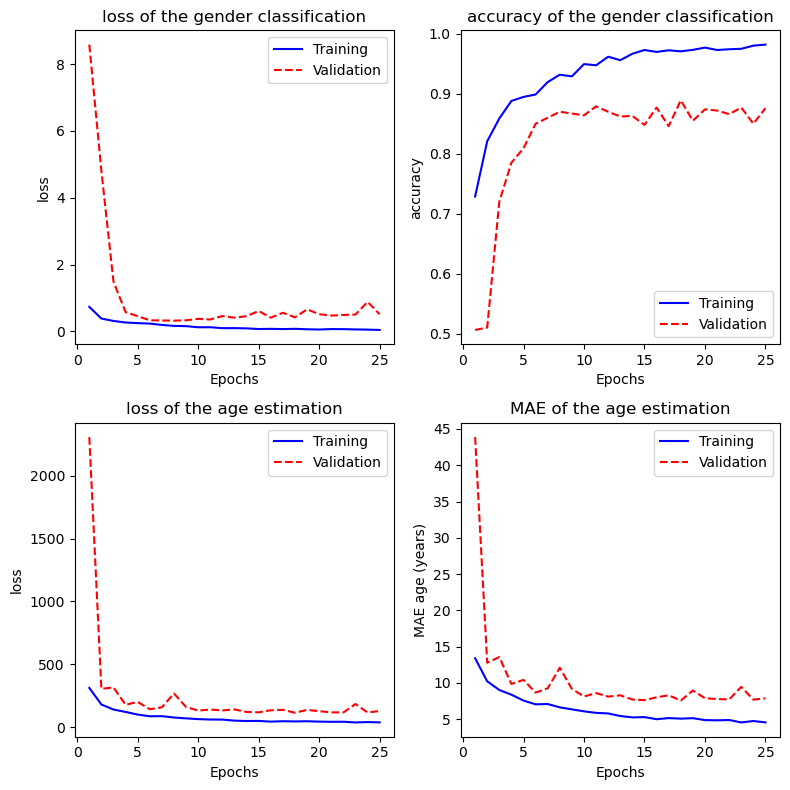

In [47]:
#
# Add your code here
#
history = modelA.history.history
plots = [
    [[history['gender_output_loss'],history['val_gender_output_loss']],
     [history['gender_output_accuracy'],history['val_gender_output_accuracy']]],
    [[history['age_output_loss'],history['val_age_output_loss']],
     [history['age_output_mae'],history['val_age_output_mae']]]
]

y_axis = [['loss', 'accuracy'],
          ['loss', 'MAE age (years)']]

titles = [['loss of the gender classification', 'accuracy of the gender classification'],
          ['loss of the age estimation', 'MAE of the age estimation']]

fig, ax = plt.subplots(2,2, figsize=(8,8))

for i in range(0,2):
    for j in range(0,2):
        ax[i][j].plot(range(1,num_epochs+1),plots[i][j][0], label='Training', linestyle='-', color='blue')
        ax[i][j].plot(range(1,num_epochs+1),plots[i][j][1], label='Validation', linestyle='--', color='red')
        ax[i][j].set_xlabel('Epochs')
        ax[i][j].set_ylabel(y_axis[i][j])
        ax[i][j].set_title(titles[i][j])
        ax[i][j].legend()
fig.tight_layout()

## STEP2B: Build a CNN network based on a pre-trained model 
Choose one existing CNN architecture pre-trained on ImageNet, and fine-tune on this dataset.

The same as required in Model A, **don’t resize the input image size**. **The output layer for the gender branch is set to have only 1 unit**. 

In the end of the cell, use `modelB.summary()` to output the model architecture. You may also use `plot_model()` to visualize its architecture.


In [ ]:
#
# Add your code here
#

modelB.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelB, show_shapes=True)

## STEP3B: Compile and train your model
Compile and train your model here. 
Save your model to `age_gender_B.h5` after training. 

**DON'T use any other name for your model file.** This is because my test code relies on this particular model name. Any other file name will cause problem in the testing stage.

**Also, save the model with `save()` instead of `save_weights()`.** 


In [ ]:
#
# Add your code here
#

modelB.save(your_model_folder+"age_gender_B.h5")

## STEP4B: Draw the learning curve
Draw four figures as follows
1.	The loss of the gender classification over the training and validation set
2.	The accuracy of the gender classification over the training and validation set
3.	The loss of the age estimation over the training and validation set
4.	The MAE of the age estimation over the training and validation set

In [ ]:
#
# Add your code here
#


## STEP5: Evaluate the model on the test set
I will add my test code here to test the two models you trained. The test set will not be available before your submission. 

The metrics for measuring the performance on the test set are:
- age estimation: MAE (Mean Absolute Error)
- gender classification: accuracy


In [ ]:
#
# Don't add code in this cell when submitting this file
#